In [1]:
%matplotlib inline

import numpy as np
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
from __future__ import division
import pandas as pd
import seaborn

In [2]:
def func(x, pos):  # formatter function takes tick label and tick position
    s = ((x*900)/1000000)
    s = int(s)
    return s

In [3]:
# specify residuals map to read in:
year = '2016'
#year = '2015'

stable='0515'
#stable='0414'

In [4]:
# read in residuals
# **uses masked version -- non-forest=-9999**
residuals_fn = '../paper_data/final_products/{year}_{stable}_meanresiduals_forestmask.tif'.format(year=year, stable=stable)
with rasterio.open(residuals_fn) as image:
    residuals = image.read(1)
print(residuals.shape)

(9729, 12851)


In [5]:
NLCD_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/paper_data/final_products/NLCD_forest_mask.tif'
with rasterio.open(NLCD_fn) as image:
    NLCD = image.read(1)
print(NLCD.shape)
print(np.unique(NLCD))

(9729, 12851)
[-9999     0     1]


In [6]:
# read in 2016 aerial assessment - rasterized
aerial_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/GIS_data/FS_2016aerial/DFO_GypsyMothData_2017_albers_studyarea_rast.tif'
with rasterio.open(aerial_fn) as image:
    aerial = image.read(1)
print(aerial.shape)

(9729, 12851)


In [7]:
# Read in FHTE datasets
FHTE_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/GIS_data/FHTE_ref/FHTE_ZScore_raster.tif'
with rasterio.open(FHTE_fn) as image:
    FHTE = image.read(1)
print(FHTE.shape)

FHTE_s1_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/GIS_data/FHTE_ref/FHTE_ZScore_sieve1_raster.tif'
with rasterio.open(FHTE_s1_fn) as image:
    FHTE_s1 = image.read(1)
print(FHTE_s1.shape)

FHTE_s2_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/GIS_data/FHTE_ref/FHTE_ZScore_sieve2_raster.tif'
with rasterio.open(FHTE_s2_fn) as image:
    FHTE_s2 = image.read(1)
print(FHTE_s2.shape)

(9729, 12851)
(9729, 12851)
(9729, 12851)


In [8]:
# read in 2016 aerial assessment - rasterized
states_fn = '/projectnb/landsat/projects/Massachusetts/defoliators/GIS_data/states/study_area_rast.tif'
with rasterio.open(states_fn) as image:
    states = image.read(1)
print(states.shape)

(9729, 12851)


In [9]:
residuals_12 = residuals[np.where(aerial >= 1)]
residuals_12 = residuals_12[residuals_12 != -9999]
residuals_12 = residuals_12.reshape(residuals_12.size)

residuals_3 = residuals[np.where(aerial >= 3)]
residuals_3 = residuals_3.reshape(residuals_3.size)

residuals_4 = residuals[np.where(aerial >= 4)]
residuals_4 = residuals_4.reshape(residuals_4.size)

residuals_5 = residuals[np.where(aerial == 5)]
residuals_5 = residuals_5.reshape(residuals_5.size)

residuals_na = residuals[(np.where(aerial == 0))]
residuals_na = residuals_na[residuals_na != -9999]
residuals_na = residuals_na.reshape(residuals_na.size)

In [10]:
# Area NOT defoliated in aerial with score < -1 (omission)
print((sum(residuals_na < -1)*900)/1000000)
print(sum(residuals_na < -1))

1321.6077
1468453


In [11]:
# Area NOT defoliated in aerial with score < -3 (omission)
print((sum(residuals_na < -3)*900)/1000000)
print(sum(residuals_na < -3))

197.2935
219215


In [12]:
# Area defoliated in aerial with score < -3
print((sum(residuals_12 < -3)*900)/1000000)
print(sum(residuals_12 < -3))

223.7589
248621


In [13]:
# Area defoliated in aerial with score > -1
print((sum(residuals_12 < -1)*900)/1000000)
print(sum(residuals_12 < -1))

749.0493
832277


In [14]:
res_FHTE = residuals[np.where(FHTE==4) or np.where(FHTE==3)]
res_FHTE = res_FHTE.reshape(res_FHTE.size)

res_FHTE_s1 = residuals[np.where(FHTE_s1==4) or np.where(FHTE_s1==3)]
res_FHTE_s1 = res_FHTE_s1.reshape(res_FHTE_s1.size)

res_FHTE_s2 = residuals[np.where(FHTE_s2==4) or np.where(FHTE_s2==3)]
res_FHTE_s2 = res_FHTE_s2.reshape(res_FHTE_s2.size)

res_FHTE_na = residuals[np.where(FHTE_s2==1) or np.where(FHTE_s2==2)]
res_FHTE_na = res_FHTE_na.reshape(res_FHTE_na.size)

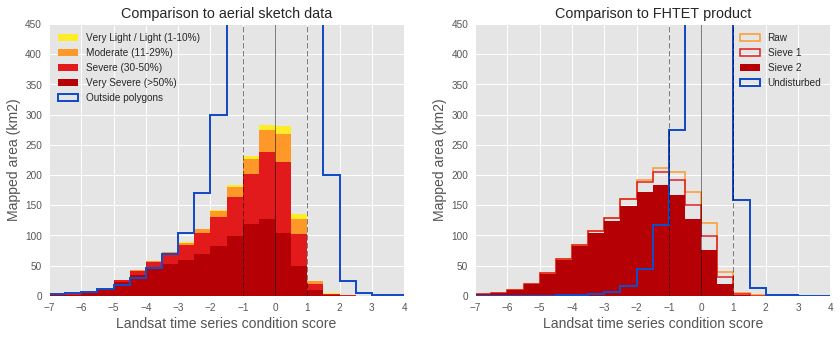

In [15]:
bins = np.arange(-10, 10, 0.5)

fig = plt.figure(1, figsize=(14,5))
plt.style.use('ggplot') 
y_format = tkr.FuncFormatter(func)  # make formatter

ax = fig.add_subplot(121)

seaborn.distplot(residuals_12, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Very Light / Light (1-10%)',
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#feed26"})

seaborn.distplot(residuals_3, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Moderate (11-29%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#fe9929"})

seaborn.distplot(residuals_4, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Severe (30-50%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#e31a1c"})

seaborn.distplot(residuals_5, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Very Severe (>50%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#b50006"})

seaborn.distplot(residuals_na, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Outside polygons', \
                 hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "#134bc9"})

plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) 
plt.axvline(-1, lw=1, color='k', ls='--', alpha=0.5)
plt.axvline(1, lw=1, color='k', ls='--', alpha=0.5)
plt.ylabel('Mapped area (km2)', fontsize=14)
plt.xlabel('Landsat time series condition score', fontsize=14)
ax.yaxis.set_major_formatter(y_format) # set formatter to needed axis
ax.yaxis.set_ticks(np.arange(1, 540000, 55556))
#plt.ylim((0, 0.8))
plt.ylim((0, 500000))
plt.xlim((-7, 4))
plt.locator_params(nbins=11)
plt.title('Comparison to aerial sketch data')
plt.legend()

ax = fig.add_subplot(122)
seaborn.distplot(res_FHTE, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Raw', \
                 hist_kws={"histtype": "step", "linewidth": 1.5, "alpha": 1, "color": "#fe9929"})

seaborn.distplot(res_FHTE_s1, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Sieve 1', \
                 hist_kws={"histtype": "step", "linewidth": 1.5, "alpha": 1, "color": "#e31a1c"})

seaborn.distplot(res_FHTE_s2, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Sieve 2', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#b50006"})

seaborn.distplot(res_FHTE_na, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Undisturbed', \
                 hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "#134bc9"})
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) 
plt.axvline(-1, lw=1, color='k', ls='--', alpha=0.5)
plt.axvline(1, lw=1, color='k', ls='--', alpha=0.5)
plt.ylabel('Mapped area (km2)', fontsize=14)
plt.xlabel('Landsat time series condition score', fontsize=14)
ax.yaxis.set_major_formatter(y_format) # set formatter to needed axis
ax.yaxis.set_ticks(np.arange(1, 540000, 55556))
#plt.ylim((0, 0.8))
plt.ylim((0, 500000))
plt.xlim((-7, 4))
plt.xticks()
plt.title('Comparison to FHTET product')
plt.legend()
plt.locator_params(nbins=11)
plt.savefig('../paper_data/figures/Figure_comparisonhist.png')
plt.show()

In [16]:
residuals

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ..., 
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [17]:
# Area stats for Rhode Island
#RI = states[(states == 44) & (residuals != -9999)].shape[0]
RI = states[(states == 44) & (NLCD == 1)].shape[0]
RI_km2 = (RI*30*30)/(1000*1000)
print("Total forested area: {RI} km2".format(RI=RI_km2))

RI_5 = aerial[((aerial == 5) & (states == 44)& (residuals != -9999))].shape[0]
RI_5_km2 = (RI_5*30*30)/(1000*1000)

RI_4 = aerial[((aerial == 4) & (states == 44) & (residuals != -9999))].shape[0]
RI_4_km2 = (RI_4*30*30)/(1000*1000)

RI_3 = aerial[((aerial == 3) & (states == 44) & (residuals != -9999))].shape[0]
RI_3_km2 = (RI_3*30*30)/(1000*1000)

print("Area from aerial: {aerial} km2 - >50% ({perc}%)".format(aerial=RI_5_km2, perc=(RI_5_km2/RI_km2)*100))

aerial_45_km2 = RI_4_km2 + RI_5_km2
print("Area from aerial: {aerial} km2 - >30% ({perc}%)".format(aerial=aerial_45_km2, perc=(aerial_45_km2/RI_km2)*100))

aerial_345_km2 = RI_3_km2 + RI_4_km2 + RI_5_km2
print("Area from aerial: {aerial} km2 - >11% ({perc}%)".format(aerial=aerial_345_km2, perc=(aerial_345_km2/RI_km2)*100))

FHTE_4 = FHTE_s2[(states == 44) & (FHTE_s2 ==4) & (residuals != -9999)].shape[0]
FHTE_3 = FHTE_s2[(states == 44) & (FHTE_s2 ==3) & (residuals != -9999)].shape[0]
FHTE_km2 = ((FHTE_4 + FHTE_3)*30*30)/(1000*1000)
print("Area from FHTE: {FHTE} km2 ({perc}%)".format(FHTE=FHTE_km2, perc=(FHTE_km2/RI_km2)*100))

level = -1
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2,level=level,  perc=(LTS_km2/RI_km2)*100))
level = -2
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2, level=level, perc=(LTS_km2/RI_km2)*100))
level = -3
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2, level=level, perc=(LTS_km2/RI_km2)*100))



Total forested area: 1252.6857 km2
Area from aerial: 448.4718 km2 - >50% (35.8008237821%)
Area from aerial: 519.9399 km2 - >30% (41.5060138389%)
Area from aerial: 524.5389 km2 - >11% (41.8731450355%)
Area from FHTE: 640.7838 km2 (51.1527991419%)
Area from LTS @ -1: 617.8779 km2 (49.3242558768%)
Area from LTS @ -2: 386.5941 km2 (30.8612208154%)
Area from LTS @ -3: 220.4811 km2 (17.6006719004%)
